# Judge Research Feature Sample
## Setup
Import modules for fetching and analyzing historical data:

In [32]:
from historical_data import Coinalytix, HDParams, JRParams
import json
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

## Authenticate
Enter your API keys here:

In [33]:
CA_API_KEY = "<paste your coinalytix.io key here>"
JR_API_KEY = "<paste your judge research api key here>"

## Configure Assets
Define the parameters for your historical data:

In [34]:
asset = HDParams()

# Set exhange, must be "BINANCE" or ...
asset.exchange = "BINANCE"

# Set asset, currently supports "BTC-USD-SPOT", "ETH-USD-SPOT", ...
asset.ticker = "BTC-USD-SPOT"

# Set start of reporting period in form YYYY-MM-DD HH:MM:SS
# Dates after 2019...? supported
asset.set_start_date("2022-01-01 08:00:00")
                     
# Set reporting interval, currently supports "1d", "1m"...
asset.interval = "1d"
                     
# Set number of reporting periods                    
asset.num_periods = 365

## Collect Data

In [35]:
# Collect to Coinalytix with API key and request asset data
HD = Coinalytix()
HD.with_api_key(CA_API_KEY)
asset_data = HD.fetch_hd(asset)

# Create Pandas data frame from result
hddf = pd.DataFrame.from_dict(asset_data)

# Print 5 sample lines
hddf.tail(5)

,StartDate,Open,High,Low,Close
101,1.649722e+09,39530.4,40699.0,39254.6,40074.9
102,1.649808e+09,40074.9,41561.3,39588.5,41147.8
103,1.649894e+09,41147.8,41500.0,39551.9,39942.4
104,1.649981e+09,39942.4,40870.4,39766.4,40551.9
105,1.650067e+09,40551.9,40709.4,40054.9,40079.6


## Create your feature generation function

In [36]:
# Calculate your feature data here
# The feature_gen function accepts a dictonary formatted as.... and expects TYPE return value

def feature_gen(price):
    _calculated_value = "1"
    return _calculated_value
        

## Research & Test
Analyze and chart your dependent and indepenent variables

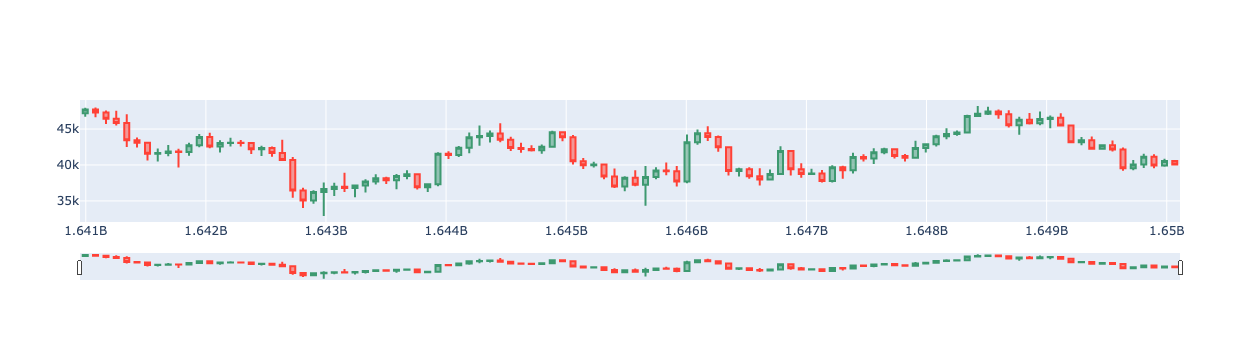

In [37]:
fig = go.Figure(data=[go.Candlestick(x=hddf['StartDate'],
                open=hddf['Open'],
                high=hddf['High'],
                low=hddf['Low'],
                close=hddf['Close'])])

fig.show()

## Configure Judge Research Feature Parameters
Set the constants & default values below as appropriate.

In [38]:
jrparams = JRParams()

# DV - a string specifying the dependent variable. Choices during the alpha test are "ETH-USD", 
# "BTC-USD", and "V-BTC-USD", which denotes the volatility of BTC-USD.
jrparams.dv = "ETH-USD"

# MBS - a string specifying the block size of the observation, in minutes. 
# This can be any positive number. For the alpha test, we are currently set to test four hour series,
# so 240 should be the value you set. We will likely include another time frame for the alpha test, 
# and will update this document when we do.
jrparams.mbs = "240"

# FEATURE_NAME - an alphanumeric string for the name of the feature, of length no more than 50 characters. 
# You can name the feature whatever you want.
jrparams.feature_name = "testfeature001"

# VALUE - the most important part! A string with the value of the feature, also of length no more than 50 characters.
# The default value is set here, the feature_gen function will set this variable when generating new feature data.
jrparams.value = "0"    # default value

# IPP - optional, defaults to "last" - what type of interpolation procedure is appropriate for your feature. 
# Values can be either "last" - fill in the missing value with the last observed value - and "zero" - fill in 
# the last value with a 0.
jrparams.ipp = "last"    # default value

## Scheduling and Headless Execution
The feature_gen function can be run periodically from this notebook or exported for use in a self-contained docker runtime environment.  Running the feature generation locally, in this notebook, is appropriate for reasearch and testing; however, the notebook UI adds a layer of complexity which may be undesirable in production.

### Scheduling inside this notebook
instuctions here for python cron stuff...

### Scheduling a headless docker runtime 
instuctions for running the feature_gen code in a self-sufficient docker container..